# Final Project Statistics for Data Science with Python 
### Load the Dataset

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

## upload the dataframe to pandas

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

### Descriptive Statistics and Visualizations

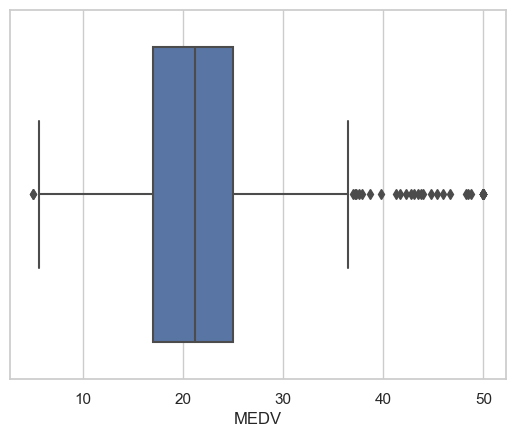

In [32]:
## Box Plot of Median Value of Owner Occupied Homes
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats

ax = sns.boxplot(x="MEDV", data=boston_df)

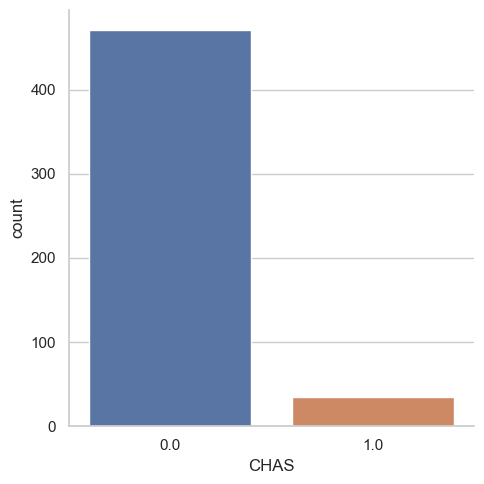

In [19]:
## Barplot (using .catplot) of the Charles River Variable
sns.catplot(x='CHAS', kind='count', data=boston_df)

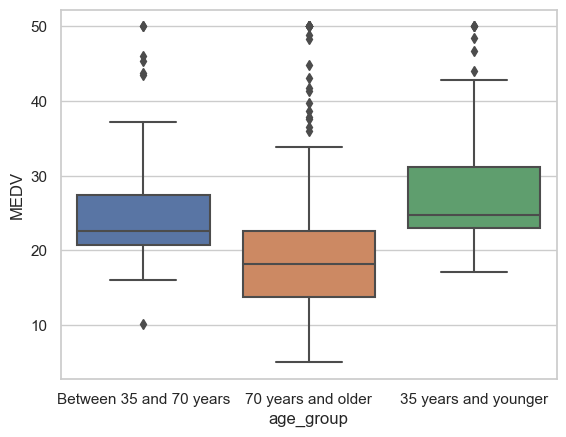

In [25]:
## Build the groups for the Box Plot of the Age variable
boston_df.loc[(boston_df['AGE']<= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE']> 35)&(boston_df['AGE'] < 70), 'age_group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>= 70), 'age_group'] = '70 years and older'

## boxplot of Median Value of each group
ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df)
plt.show()

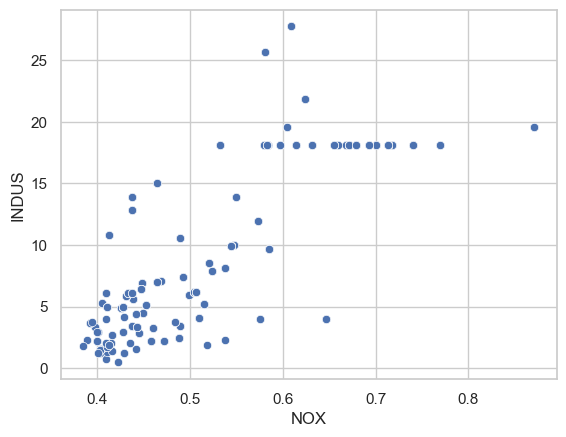

In [27]:
## Scatterplot showing relationship between Nitric Oxide Concentration and Non Retail Propotion (in Acres) of Town
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.show()

C:\Users\jeffg\AppData\Local\Temp\ipykernel_23792\559236048.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['PTRATIO'], kde = False)


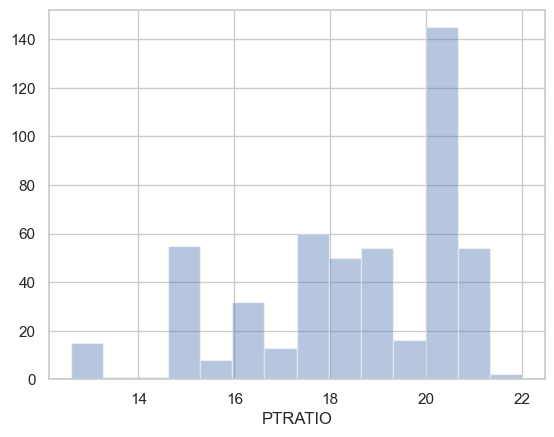

In [31]:
ax = sns.distplot(boston_df['PTRATIO'], kde = False)

### Statistical Tests for Different Scenarios
- __NOTE__: All of the tests use an Alpha of _0.05_

__Is there a significant difference in median value of houses bounded by the Charles river or not?__

In [37]:
## Null Hypothesis: There is no significant difference of the median value of houses bound by the Charles River

# Levene's Test for Equal Variance
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                  boston_df[boston_df['CHAS']== 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [36]:
# Looks like there is not equal variance
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                  boston_df[boston_df['CHAS']== 0]['MEDV'], equal_var=False)

## CONCLUSION: P-value is below the Alpha, we reject the Ho

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

__Is there a difference in Median values of houses for each proportion of owner occupied units built prior to 1940?__

In [40]:
## Null Hypothesis: There is no difference in the median value of the proportion

# Levene's Test
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'Between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [42]:
# There is equal variance

# Assign the variables for the ANOVA
age1 = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
age2 = boston_df[boston_df['age_group'] == 'Between 35 and 70 years']['MEDV'] 
age3 = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

# ANOVA
f_statistic, p_value = scipy.stats.f_oneway(age1, age2, age3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

## CONCLUSION: P-value is below the Alpha, we reject the Ho

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


__Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?__

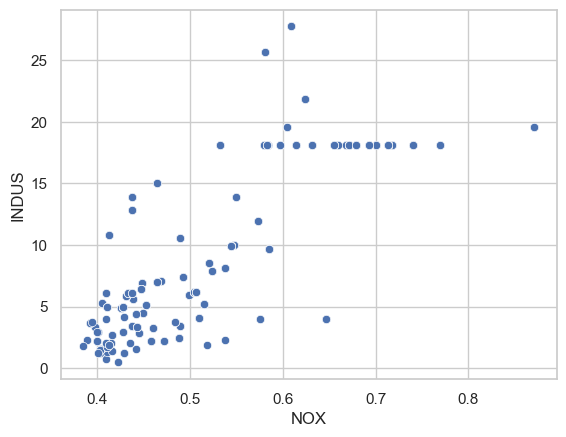

In [44]:
## Null Hypothesis: There is no relationship between Nitric Oxide Concentrations and the Proportion of Non-Retail Business
## acres per town

# First, the let's get a rough look at the correlation and we can copy and paste it from the above
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.show()

In [47]:
# Looks like there could be a positive correlation

# Pearson Correlation Test
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

## CONCLUSION: P-value is below the Alpha, we reject the Ho

PearsonRResult(statistic=0.7636514469209162, pvalue=7.913361061229697e-98)

__What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?__

In [50]:
## Null Hypothesis: There is no statistically signifcant impact of an additional weighted distance to the five Boston
## employment centres on the median value of owner occupied homes

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

## CONCLUSION: P-value is below the Alpha, we reject the Ho

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        17:25:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""